In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.linear_model import LogisticRegression as LR

data = pd.read_csv(r"/Users/stevenyu/Workspace/sklearn/05LogisticRegression/rankingcard.csv",index_col=0)

In [3]:
#data 重複值的處理

#Step1: 刪除重複值
data.drop_duplicates(inplace=True)
#Step2: 恢復索引
data.index = range(data.shape[0])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [4]:
#data 填補缺失值

#查看各項的缺失情況
data.isnull().sum()/data.shape[0]

#NumberOfDependents 用平均值填補
data["NumberOfDependents"].fillna(int(data["NumberOfDependents"].mean()),inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

In [5]:
#用隨機回歸森林填補 MonthlyIncome

def fill_missing_rf(X,y,to_fill):
    """
    參數:
    X:要填補的特徵矩陣
    y:沒有缺失的標籤
    to_fill: 要填補的名稱
    """

    #構建新的特徵矩陣和標籤
    df = X.copy()
    fill = df.loc[:,to_fill]
    df = pd.concat([df.loc[:,df.columns != to_fill],pd.DataFrame(y)],axis=1)

    #找出訓練集和測試集
    Ytrain = fill[fill.notnull()]
    Ytest = fill[fill.isnull()]
    Xtrain = df.iloc[Ytrain.index,:]
    Xtest = df.iloc[Ytest.index,:]

    #用隨機森林回歸填補缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=100)
    rfr = rfr.fit(Xtrain,Ytrain)
    Ypredict = rfr.predict(Xtest)
    
    return Ypredict


In [6]:
X = data.iloc[:,1:]
y= data["SeriousDlqin2yrs"]

y_predict = fill_missing_rf(X,y,"MonthlyIncome")

data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"] = y_predict

In [7]:
#處理異常值

#透過描述性統計觀察異常值

data.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T


,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5425.628057,13252.745101,0.0,0.0,0.180000,1800.000000,4420.000000,7416.000000,10800.000000,23205.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [8]:
#處理 age 異常值

(data["age"] == 0).sum()

data = data[data["age"] != 0] #刪除 age = 0 的異常值
data.index = range(data.shape[0])

In [9]:
"""
處理 
1. NumberOfTime30-59DaysPastDueNotWorse	
2. NumberOfTime60-89DaysPastDueNotWorse	
3. NumberOfTimes90DaysLate

不該出現違約 98 次的情況
"""

data.loc[:,"NumberOfTimes90DaysLate"].value_counts()

#由結果可知大部分的值皆在 0 ~ 20 之間，可判斷 96 98 為異常值

NumberOfTimes90DaysLate
0     141107
1       5232
2       1555
3        667
4        291
98       220
5        131
6         80
7         38
8         21
9         19
10         8
96         5
11         5
13         4
15         2
14         2
12         2
17         1
Name: count, dtype: int64

In [10]:
#刪除異常違約值
data = data[data.loc[:,"NumberOfTimes90DaysLate"] < 90]
data.index = range(data.shape[0])


data.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149165.0,0.066188,0.248612,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149165.0,6.078770,250.453111,0.0,0.0,0.003174,0.030033,0.153615,0.553698,0.97502,1.094061,50708.0
age,149165.0,52.331076,14.714114,21.0,24.0,33.000000,41.000000,52.000000,63.000000,72.00000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149165.0,0.246720,0.698935,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,13.0
DebtRatio,149165.0,354.963542,2043.344496,0.0,0.0,0.036385,0.178211,0.368619,0.876994,1277.30000,4989.360000,329664.0
MonthlyIncome,149165.0,5429.669800,13261.846549,0.0,0.0,0.180000,1800.000000,4433.000000,7418.000000,10800.00000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149165.0,8.493688,5.129841,0.0,1.0,3.000000,5.000000,8.000000,11.000000,15.00000,24.000000,58.0
NumberOfTimes90DaysLate,149165.0,0.090725,0.486354,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,17.0
NumberRealEstateLoansOrLines,149165.0,1.023927,1.130350,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.00000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149165.0,0.065069,0.330675,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,11.0


In [11]:
# 查看樣本不均勻

X = data.iloc[:,1:]
y = data.iloc[:,0]

y.value_counts()

n_sample = X.shape[0]

n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]

print("樣本數: {}; 1: {:.2%}; 0: {:.2%}".format(n_sample,n_1_sample/n_sample,n_0_sample/n_sample))

樣本數: 149165; 1: 6.62%; 0: 93.38%


In [12]:
#處理樣本不均勻的問題 => 目標是改變整體樣本數來達成樣本數均勻
#imblearn 專門用來處理不平衡之數據集，相較於 sklearn 快

import imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X,y = sm.fit_resample(X,y)

n_oversample = X.shape[0]

pd.Series(y).value_counts()

n_1_oversample = pd.Series(y).value_counts()[1]
n_0_oversample = pd.Series(y).value_counts()[0]

print("樣本數: {}; 1: {:.2%}; 0: {:.2%}".format(n_oversample,n_1_oversample/n_oversample,n_0_oversample/n_oversample))

樣本數: 278584; 1: 50.00%; 0: 50.00%


In [13]:
#分訓練集和測試集

from sklearn.model_selection import train_test_split
X = pd.DataFrame(X)
y = pd.DataFrame(y)

X_train,X_vali,Y_train,Y_vali = train_test_split(X,y,test_size=0.3,random_state=420)

#為了適配接下來的分箱，因此要將 Y_train X_train 合併
model_data = pd.concat([Y_train,X_train],axis=1)
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns

vali_data = pd.concat([Y_vali,X_vali],axis=1)
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns

#將訓練集和測試集輸出成.csv，避免分箱影響到原始數據
model_data.to_csv(r"/Users/stevenyu/Workspace/sklearn/05LogisticRegression/model_data.csv")
vali_data.to_csv(r"/Users/stevenyu/Workspace/sklearn/05LogisticRegression/vali_data.csv")

### 分箱
1. 意義:將不同的屬性的人分成不同類別 (離散化連續變量)
2. 實現: 金融風控模型 (參考: https://zhuanlan.zhihu.com/p/80134853) 
3. 模型: IV model 優勢為圖表可視化，方便入門理解
4. 步驟: 
    - 將連續型變量分成數量較多的分類型變量
    - 確保每組都要包含兩種類別的樣本，不然 IV 值無法計算
    - 進行卡方檢驗，P值很大的組進行合併，直到組數小於 N
    - 觀察 IV 值的變化，選出最佳箱數


In [14]:
#選取最佳分箱個數的函數
def Best_Classification( DF , X , Y , n=5 , q=20 , graph=True):
    """
    參數:
        DF    : data
        X     : 分箱之列名
        Y     : 對應的標籤
        n     : 保留的分箱個數
        q     : 初始的分箱個數
        graph : 是否要畫出 IV 圖
    """

    #STEP1: 將連續型變量分成數量較多的分類型變量

    """
    pd.qcut 為分位的分箱函數，將連續型變量離散化
    q: 要分箱的個數
    retbins:True 要求返回樣本索引
    """

    DF = DF[[X,Y]].copy()
    DF["qcut"], bins = pd.qcut(DF[X],retbins=True,q=q,duplicates="drop")
    
    #透過groupby 取得各箱(年齡區間)有多少 0 和 1
    bin_count_1 = DF.loc[DF[Y] == 1].groupby(by="qcut").count()[Y]
    bin_count_0 = DF.loc[DF[Y] == 0].groupby(by="qcut").count()[Y]
    #用 *zip 將年齡區間、0、1包成一個表格
    num_bins = [*zip( bins, bins[1:], bin_count_0 , bin_count_1)]


    #STEP2: 確保每組都要包含兩種類別的樣本

    for i in range(q):
        #若第一組有缺則向後合併
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(
                num_bins[0][0],
                num_bins[1][1],
                num_bins[0][2]+num_bins[1][2],
                num_bins[0][3]+num_bins[1][3]
            )]
            continue
        #其他組若有缺則向前合併
        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1,i+1] = [(
                    num_bins[i-1][0],
                    num_bins[i][1],
                    num_bins[i-1][2]+num_bins[i][2],
                    num_bins[i-1][3]+num_bins[i][3]
                )]
                break
        else:
            break

    #STEP3: 計算 woe 值
    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins,columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0 / df.count_0.sum()
        df["bad%"] = df.count_1 / df.count_1.sum()
        df["woe"] = np.log(df["good%"]/df["bad%"])
        return df
    
    #STEP4: 計算 IV 值
    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return iv
    
    #STEP5: 卡方驗證 ＆ 合併箱體，達到最佳分箱個數

    IV = []
    axisx = []  #存每次合併後箱子的個數
    while len(num_bins) > n:
        pvs = []
        # num_bins 兩倆之間的卡方檢驗
        for i in range(len(num_bins) - 1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)
        
        # i 為 p 值最大的兩組
        i = pvs.index(max(pvs))
        #合併p值最大的兩組
        num_bins[i:i+2] = [(
            num_bins[i][0],
            num_bins[i+1][1],
            num_bins[i][2]+num_bins[i+1][2],
            num_bins[i][3]+num_bins[i+1][3]
        )]

        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
    
    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.show()
    
    return bins_df


In [29]:
model_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

RevolvingUtilizationOfUnsecuredLines


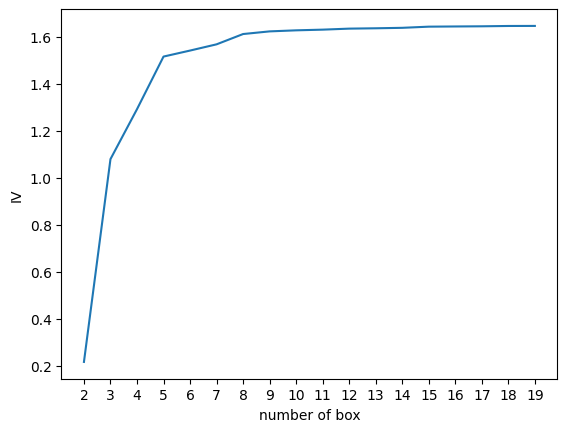

age


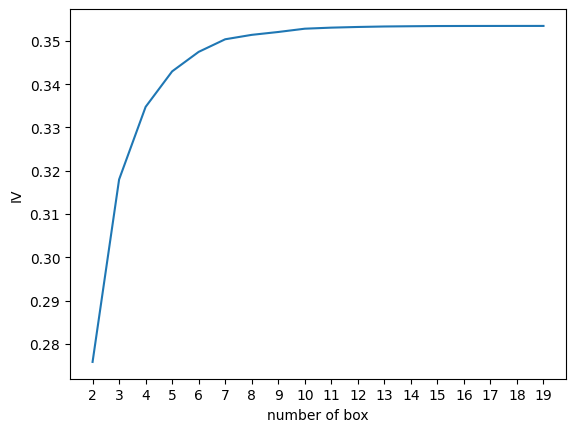

NumberOfTime30-59DaysPastDueNotWorse


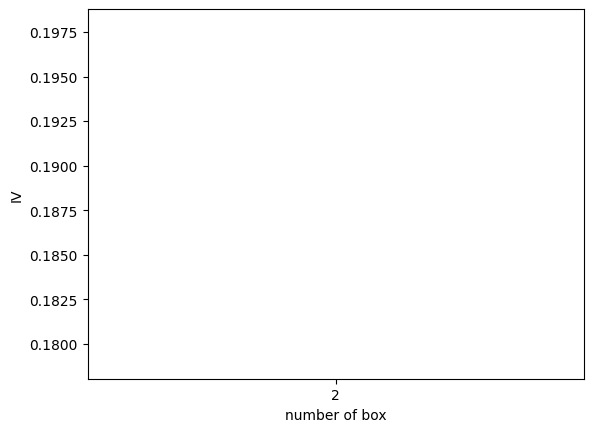

DebtRatio


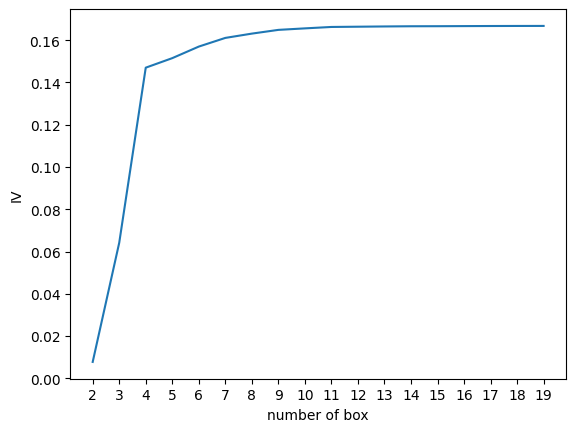

MonthlyIncome


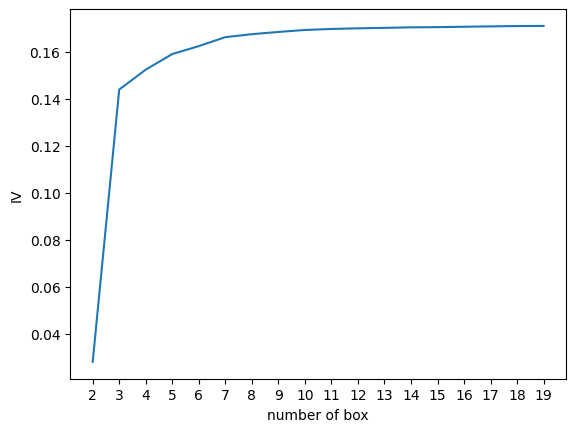

NumberOfOpenCreditLinesAndLoans


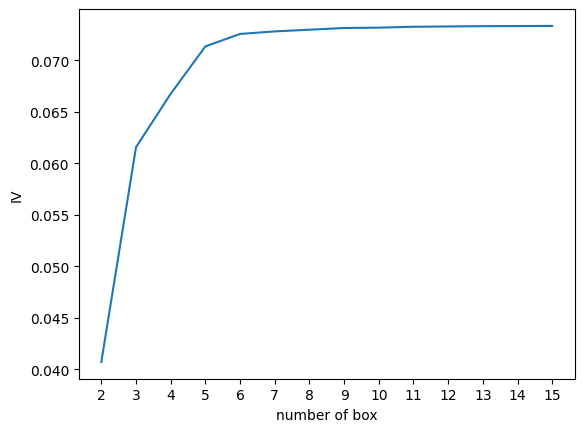

NumberOfTimes90DaysLate


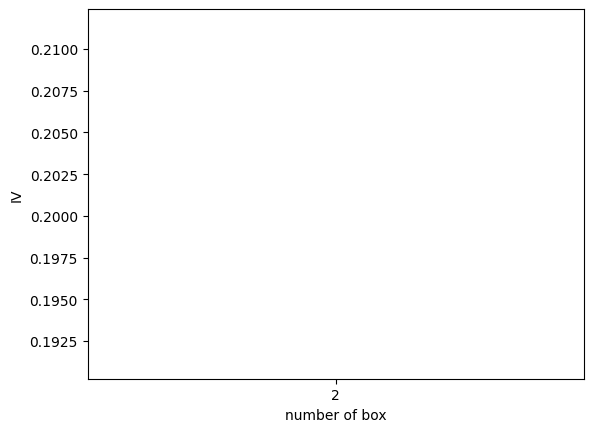

NumberRealEstateLoansOrLines


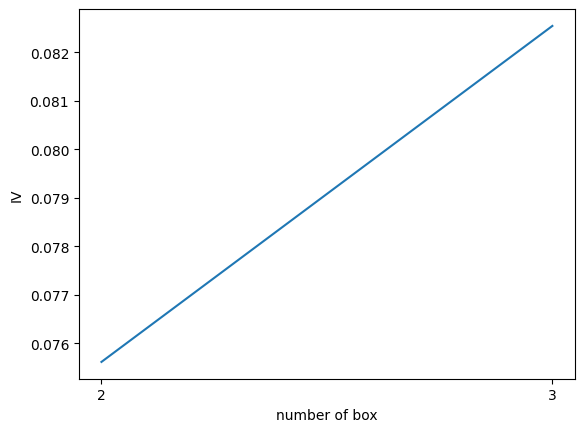

In [44]:

for i in model_data.columns[1:-2]:
    print(i)
    Best_Classification(model_data,i,"SeriousDlqin2yrs",n=2,q=20,graph=True)

In [91]:
auto_bins = {
    "RevolvingUtilizationOfUnsecuredLines":6,
    "age":5,
    "DebtRatio":4,
    "MonthlyIncome":5,
    "NumberOfOpenCreditLinesAndLoans":5
}

#無法自動最佳分箱
hand_bins ={
    "NumberOfTime30-59DaysPastDueNotWorse": [0,1,2,13],
    "NumberOfTimes90DaysLate": [0,1,2,17],
    "NumberRealEstateLoansOrLines": [0,1,2,4,54],
    "NumberOfTime60-89DaysPastDueNotWorse": [0,1,2,8],
    "NumberOfDependents":[0,1,2,3]
}
#用正負無窮取代手動分箱的上下限，避免新資料進來導致錯誤
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}

In [92]:
bins_of_range = {}

for col in auto_bins:
    bins_df = Best_Classification(model_data,col
                                  ,"SeriousDlqin2yrs"
                                  ,n=auto_bins[col]
                                  ,q=20
                                  ,graph=False)
    #bins_list 由小到大區間排列出來
    bins_list = sorted(set(bins_df["min"]).union(bins_df["max"]))
    #將bins_list最小和最大值替換成正負無窮大
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_range[col] = bins_list

#合併手動＆自動分箱
bins_of_range.update(hand_bins)

bins_of_range

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.09912635319504544,
  0.298024376299956,
  0.4653171457536195,
  0.9823724176830736,
  0.9999999,
  inf],
 'age': [-inf, 36.0, 54.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf,
  0.0173238052,
  0.4017418159947507,
  1.4669356788269436,
  inf],
 'MonthlyIncome': [-inf, 0.1033234751334021, 0.31, 5600.0, 7733.0, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 3.0, 5.0, 17.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [93]:
#計算各箱的 WOE 

def get_woe(df,col,y,bins):
    df = df[[col,y]].copy()
    df["cut"] = pd.cut(df[col],bins)
    bins_df = df.groupby("cut")[y].value_counts().unstack()
    woe = bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe

woeall = {}
for col in bins_of_range:
    woeall[col] = get_woe(model_data,col,"SeriousDlqin2yrs",bins_of_range[col])

woeall


{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.0991]     2.205113
 (0.0991, 0.298]    0.667901
 (0.298, 0.465]    -0.127577
 (0.465, 0.982]    -1.074589
 (0.982, 1.0]      -0.474468
 (1.0, inf]        -2.037016
 dtype: float64,
 'age': cut
 (-inf, 36.0]   -0.520698
 (36.0, 54.0]   -0.278936
 (54.0, 61.0]    0.246137
 (61.0, 74.0]    1.003828
 (74.0, inf]     1.722998
 dtype: float64,
 'DebtRatio': cut
 (-inf, 0.0173]     1.500179
 (0.0173, 0.402]    0.037491
 (0.402, 1.467]    -0.389667
 (1.467, inf]       0.176333
 dtype: float64,
 'MonthlyIncome': cut
 (-inf, 0.103]       1.470135
 (0.103, 0.31]       0.155484
 (0.31, 5600.0]     -0.273465
 (5600.0, 7733.0]    0.070519
 (7733.0, inf]       0.350106
 dtype: float64,
 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 1.0]   -0.843017
 (1.0, 3.0]    -0.329747
 (3.0, 5.0]    -0.059444
 (5.0, 17.0]    0.125124
 (17.0, inf]    0.456444
 dtype: float64,
 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.353286
 (0.0, 1.0]  

In [94]:
#映射所有 WOE 值到原始數據中

model_woe = pd.DataFrame(index=model_data.index)

for col in bins_of_range:
    #將原數據分箱之後，按照分箱結果填入對應的 woe 值
    model_woe[col] = pd.cut(model_data[col],bins_of_range[col]).map(woeall[col])

model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"]

#model_woe 為建模數據
model_woe


,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,2.205113,-0.278936,0.037491,-0.273465,-0.059444,0.353286,0.235255,-0.392456,0.123957,0.626052,0
1,0.667901,1.003828,0.037491,-0.273465,-0.059444,0.353286,0.235255,-0.392456,0.123957,0.626052,0
2,-2.037016,-0.278936,-0.389667,-0.273465,-0.059444,-0.875047,-1.754253,-0.392456,-1.763927,-0.477369,1
3,2.205113,1.003828,-0.389667,-0.273465,0.125124,0.353286,0.235255,0.618755,0.123957,0.626052,0
4,-1.074589,-0.278936,-0.389667,0.350106,0.125124,0.353286,0.235255,0.618755,0.123957,-0.582664,1
...,...,...,...,...,...,...,...,...,...,...,...
195003,-1.074589,-0.520698,-0.389667,0.070519,0.125124,-1.374388,0.235255,0.193105,0.123957,-0.477369,1
195004,-1.074589,-0.278936,0.037491,-0.273465,0.125124,-0.875047,0.235255,0.193105,0.123957,-0.524812,1
195005,-1.074589,-0.278936,-0.389667,0.350106,0.125124,0.353286,0.235255,0.193105,0.123957,-0.477369,1
195006,-0.474468,1.003828,0.037491,0.350106,0.125124,0.353286,0.235255,0.382101,0.123957,0.626052,0


In [95]:
#處理測試集

vali_woe = pd.DataFrame(index=vali_data.index)

for col in bins_of_range:
    vali_woe[col] = pd.cut(vali_data[col],bins_of_range[col]).map(woeall[col])

vali_woe["SeriousDlqin2yrs"] = vali_data["SeriousDlqin2yrs"]
vali_x = vali_woe.iloc[:,:-1]
vali_y = vali_woe.iloc[:,-1]

In [101]:
X = model_woe.iloc[:,:-1]
y = model_woe.iloc[:,-1]

from sklearn.linear_model import LogisticRegression as LR

lr = LR().fit(X,y)
lr.score(vali_x,vali_y)

0.7886235282856322

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

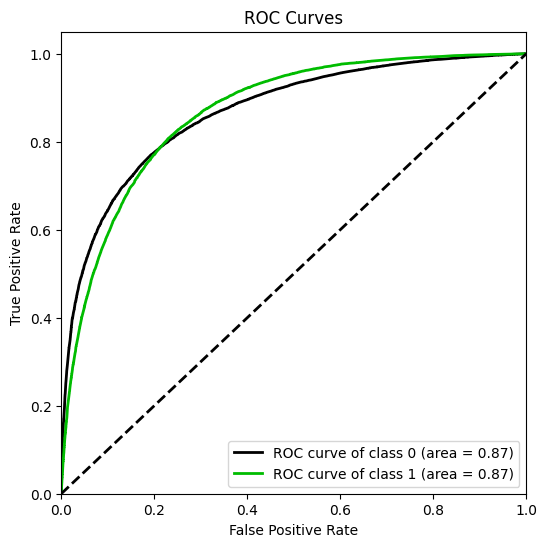

In [102]:
import scikitplot as skplt
 
#%%cmd
#pip install scikit-plot
 
vali_proba_df = pd.DataFrame(lr.predict_proba(vali_x))
skplt.metrics.plot_roc(vali_y, vali_proba_df,
                        plot_micro=False,figsize=(6,6),
                        plot_macro=False)



## 評分卡公式：Score = A - B * log(odds)

In [103]:
#製作評分卡

B = 20/np.log(2)
A = 600 + B*np.log(1/60)
 
B,A

(28.85390081777927, 481.8621880878296)

In [104]:
base_score = A - B*lr.intercept_
base_score
 
score_age = woeall["age"] * (-B*lr.coef_[0][1])
score_age

cut
(-inf, 36.0]    -4.156314
(36.0, 54.0]    -2.226519
(54.0, 61.0]     1.964709
(61.0, 74.0]     8.012748
(74.0, inf]     13.753294
dtype: float64

In [105]:
file = "./ScoreData.csv"
 
with open(file,"w") as fdata:
    fdata.write("base_score,{}\n".format(base_score))
for i,col in enumerate(X.columns):
    score = woeall[col] * (-B*lr.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file,header=True,mode="a")